#### Step 1: Download the dataset


In [ ]:
file_path =  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


#### Step 2: Import necessary libraries and load the dataset


#### Display the first few rows to understand the structure of the data


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

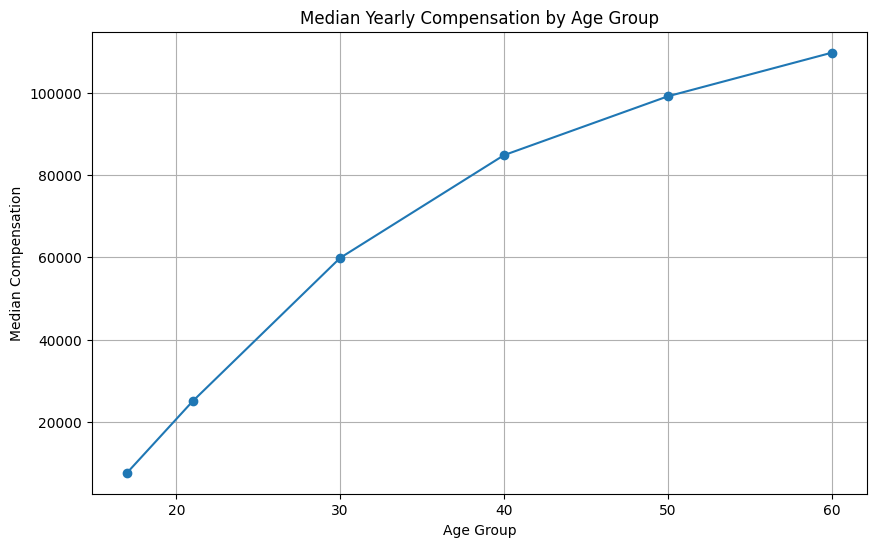

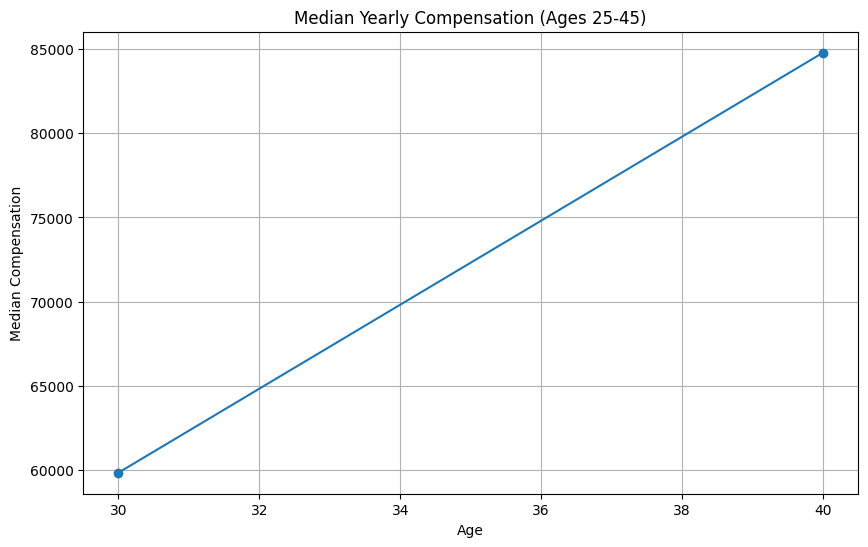

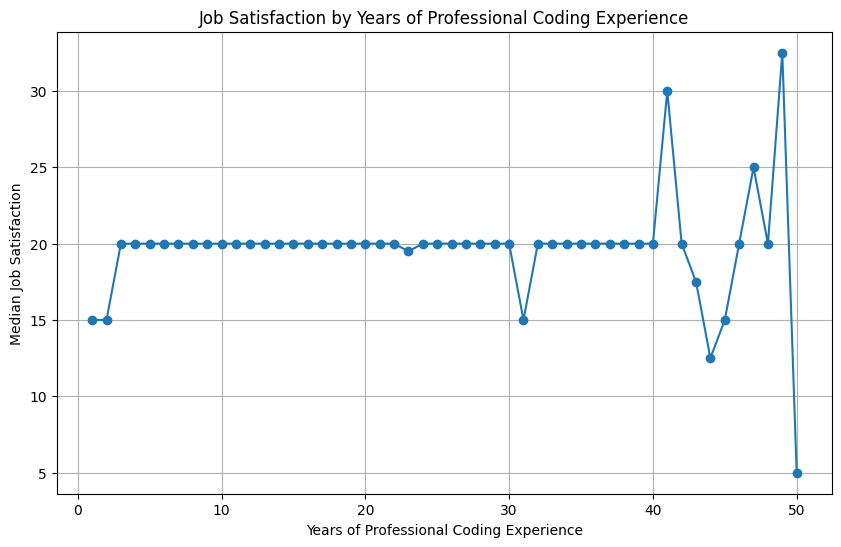

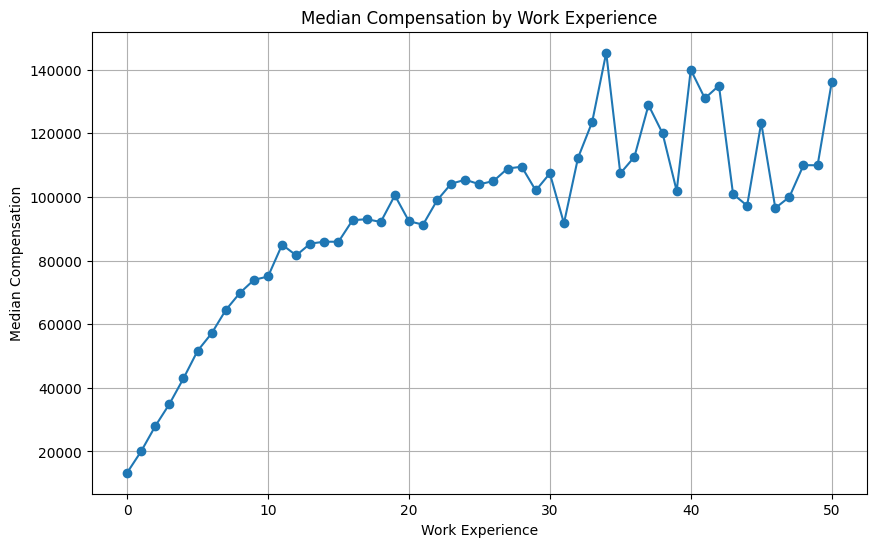

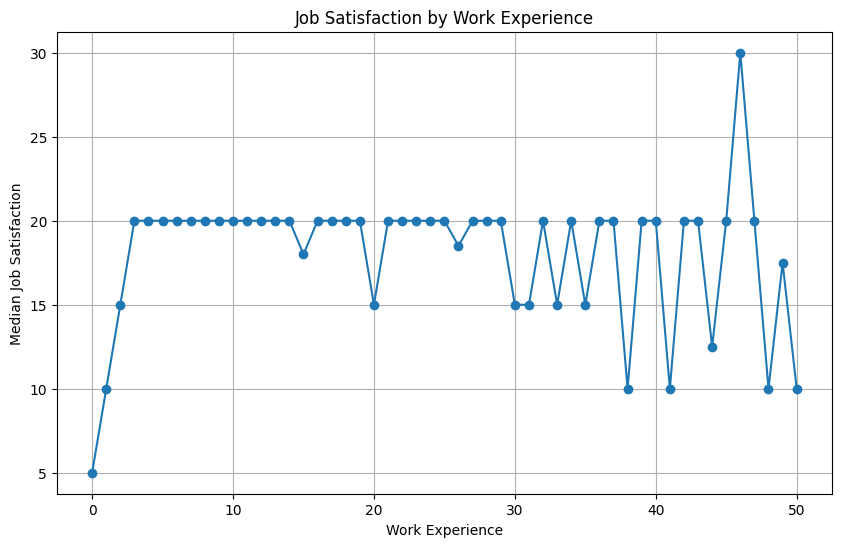

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


def load_and_preprocess_data(file_path):
    """Loads the data and preprocesses relevant columns."""
    df = pd.read_csv(file_path)

    # Convert age and experience-related columns to numeric
    df['AgeNumeric'] = df['Age'].map({
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 30,
        '35-44 years old': 40,
        '45-54 years old': 50,
        '55-64 years old': 60,
        '65-74 years old': 70,
        '75 years or older': 75,
        'Prefer not to say': None
    })
    
    for col in ['ConvertedCompYearly', 'JobSatPoints_6', 'WorkExp', 'YearsCodePro']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    return df


def create_line_chart(x_data, y_data, title, xlabel, ylabel):
    """Creates and displays a line chart."""
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)  # Add grid for better readability
    plt.show()


# Load and preprocess the data
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = load_and_preprocess_data(file_path)

# Display first few rows
print(df.head())



# Task 1: Compensation Trends
# 1. Median Yearly Compensation by Age Group
median_comp_by_age = df.groupby('AgeNumeric')['ConvertedCompYearly'].median()
create_line_chart(median_comp_by_age.index, median_comp_by_age.values, 
                 'Median Yearly Compensation by Age Group', 'Age Group', 'Median Compensation')


# 2. Median Compensation for Ages 25-45
age_filtered_df = df[(df['AgeNumeric'] >= 25) & (df['AgeNumeric'] <= 45)]
median_comp_filtered = age_filtered_df.groupby('AgeNumeric')['ConvertedCompYearly'].median()

create_line_chart(median_comp_filtered.index, median_comp_filtered.values, 
                 'Median Yearly Compensation (Ages 25-45)', 'Age', 'Median Compensation')



# Task 2: Job Satisfaction by Experience
# 1. Job Satisfaction by YearsCodePro (using YearsCodePro as a proxy for experience)
median_jobsat_by_experience = df.groupby('YearsCodePro')['JobSatPoints_6'].median()


create_line_chart(median_jobsat_by_experience.index, median_jobsat_by_experience.values,
                   'Job Satisfaction by Years of Professional Coding Experience','Years of Professional Coding Experience', 'Median Job Satisfaction')



# Task 3: Job Satisfaction and Compensation by Experience
# 1. Median Compensation by WorkExp
median_comp_by_workexp = df.groupby('WorkExp')['ConvertedCompYearly'].median()
create_line_chart(median_comp_by_workexp.index, median_comp_by_workexp.values, 
                 'Median Compensation by Work Experience', 'Work Experience', 'Median Compensation')


# 2. Job Satisfaction by WorkExp
median_jobsat_by_workexp = df.groupby('WorkExp')['JobSatPoints_6'].median()
create_line_chart(median_jobsat_by_workexp.index, median_jobsat_by_workexp.values,
                   'Job Satisfaction by Work Experience','Work Experience', 'Median Job Satisfaction')

In [5]:
df['WorkExp'].unique()

array([nan, 17., 15., 12., 29., 10., 18., 16.,  6.,  7., 14.,  3.,  4.,
        8.,  1.,  9., 27., 31., 35., 25.,  5., 28., 26., 13., 30., 37.,
        2., 24., 20., 23., 19., 21., 11., 34., 32., 22.,  0., 33., 44.,
       40., 41., 36., 45., 39., 50., 38., 48., 42., 46., 43., 49., 47.])